In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
from datetime import datetime
%matplotlib inline
import math as math

In [3]:
#select start date for correlation window as well as list of tickers
start = datetime(1998, 1, 1)
symbols_list = ['QQQ']

In [4]:
#array to store prices
symbols=[]
df = pd.DataFrame()

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
  r = pdr.get_data_yahoo(ticker,start)
  # add a symbol column
  r['Symbol'] = ticker 
  symbols.append(r)

  # concatenate into df
  #df = pd.DataFrame(symbols)
  df = pd.concat(symbols)
  df = df.reset_index()
  # df = df[['Date', 'Close', 'Symbol']]
  # df['Open'] = df['Close'].shift(1)
  # df.drop(df['Symbol'])

[*********************100%***********************]  1 of 1 completed


In [5]:
df['Daily Range'] = df['High']-df['Low']
df['Log Daily Range'] = np.log(df['High']-df['Low'])

In [6]:
# Normalize the features using the preprocessing MinMaxScaler from sklearn

# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# df['Normalized Daily Range'] = min_max_scaler.fit_transform(df['Log Daily Range'])

df['QQQ Standardized Daily Range'] = (df['Log Daily Range']-df['Log Daily Range'].mean())/np.std(df['Log Daily Range'])

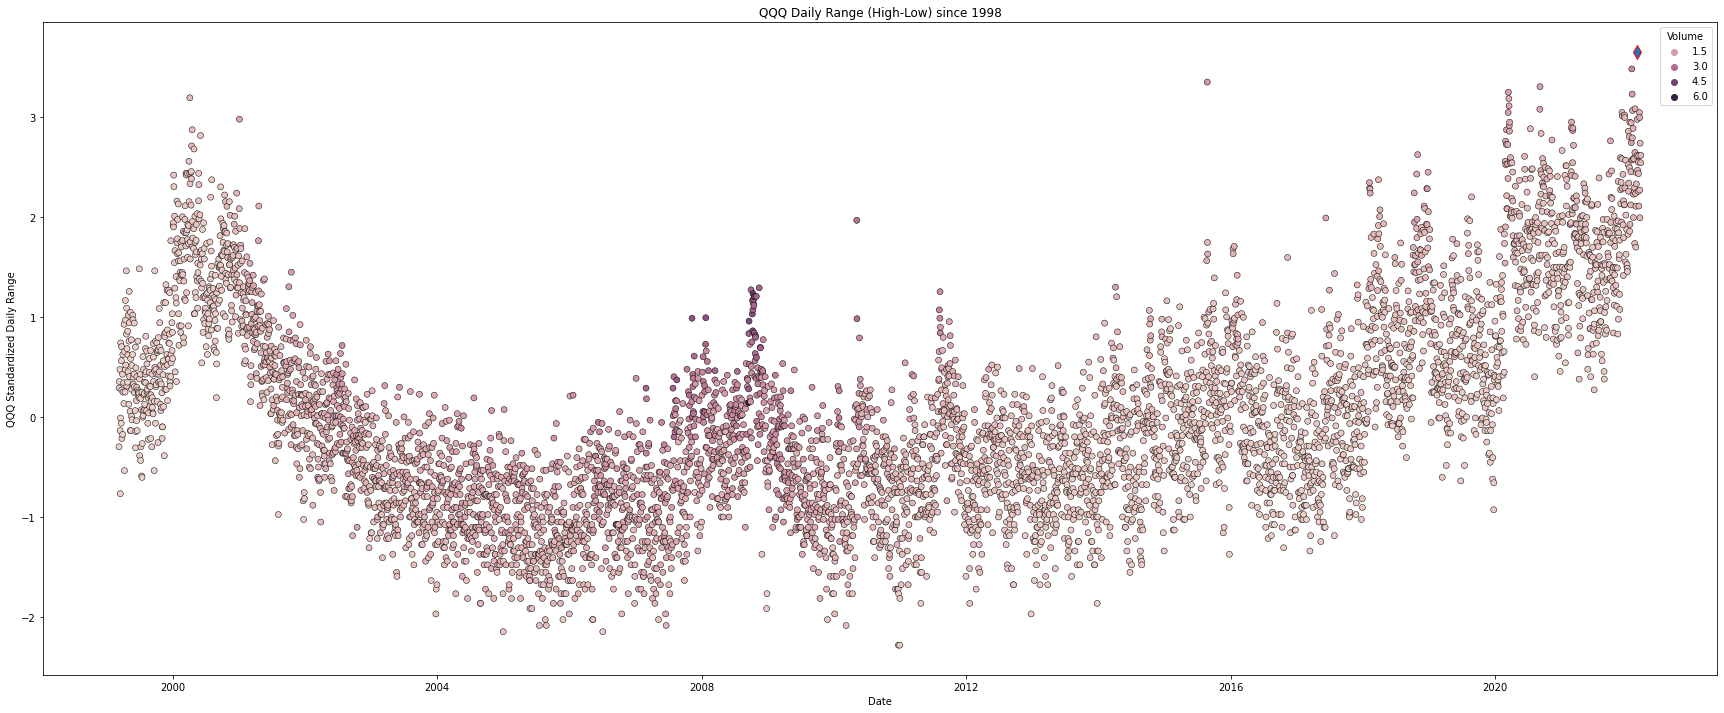

In [40]:
plt.figure(figsize=(30,12))
# plt.plot(df['Date'],df['Standardized Daily Range']);
x = df.iloc[5779,0]
y = df.iloc[5779,10]
plt.plot(x, y, marker="d", markersize=10, markeredgecolor="red")
sns.scatterplot(x=df['Date'],y=df['QQQ Standardized Daily Range'],data=df,hue=df['Volume'],edgecolor="black").set(title='QQQ Daily Range (High-Low) since 1998');

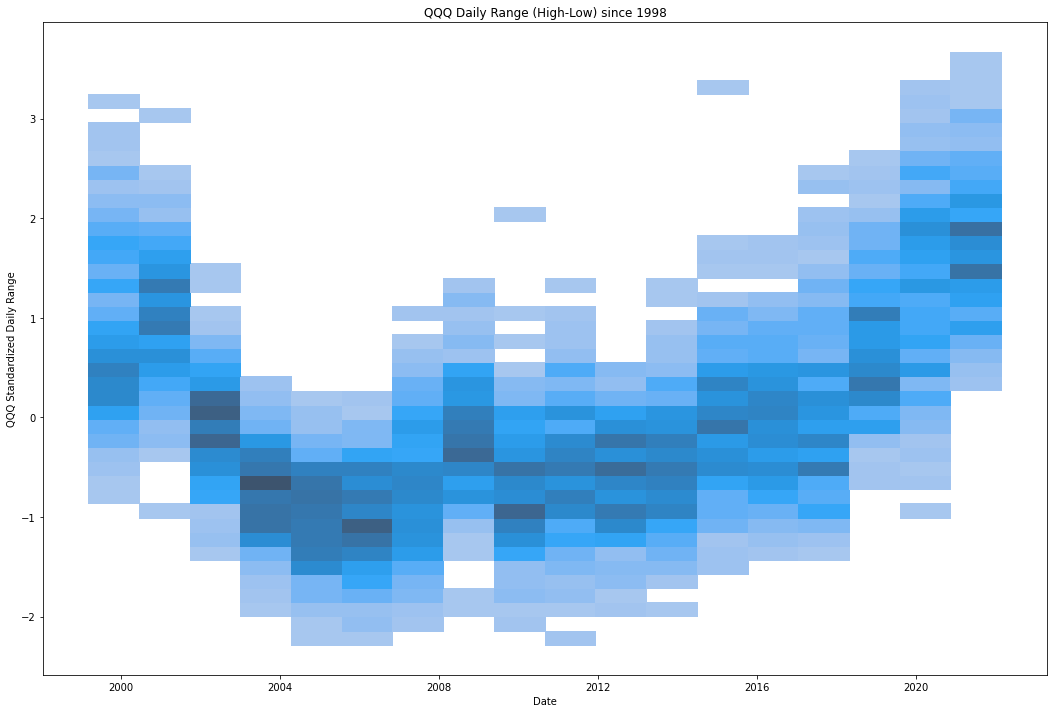

In [ ]:
plt.figure(figsize=(18,12))
# plt.plot(df['Date'],df['Standardized Daily Range']);
sns.histplot(x=df['Date'],y=df['QQQ Standardized Daily Range'],data=df,kde=True).set(title='QQQ Daily Range (High-Low) since 1998');